In [1]:
import pandas as pd
import pickle

# Dosya yollarınızı bir liste olarak oluşturun
# Bu örnek, dosya adlarının 'dosya1.pkl', 'dosya2.pkl', ..., 'dosya20.pkl' şeklinde olduğunu varsayar
dosya_yollari = [f'data/groupby-part{i}.pkl' for i in range(29, 58)]

# Tüm DataFrame'leri bu listeye ekleyin
dataframes = []

for dosya_yolu in dosya_yollari:
    # Dosyayı oku ve listeye ekle
    df = pd.read_pickle(dosya_yolu)
    dataframes.append(df)

# Tüm DataFrame'leri birleştir
birlesik_df = pd.concat(dataframes, ignore_index=True)

# Birleştirilmiş DataFrame'i kontrol et
#print(birlesik_df)
#birlesik_df["addedtodownloadqueue"].agg([max,min])- # birlesik_df.info()

/tmp/ipykernel_66027/1779189521.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
birlesik_df.tail()

,addedtodownloadqueue,deptime,recordroute,flightno,price
28999995,2022-03-12,2022-07-21 12:05:00,VVOMOW2107,SU-1705,117480
28999996,2023-01-12,2023-02-21 20:45:00,RENMOW2102,SU-1249,7474
28999997,2022-06-03,2022-06-22 01:30:00,MOWTJM2206,SU-1508,5584
28999998,2021-11-09,2022-01-25 18:00:00,MOWLED2501,7R-4381,2910
28999999,2020-01-05,2020-01-13 07:00:00,KZNMOW1301,SU-1279,9079


In [4]:
birlesik_df['deptime']

0           2021-09-05 15:15:00
1           2021-09-05 15:15:00
2           2021-09-05 15:15:00
3           2021-09-05 15:15:00
4           2021-09-05 15:15:00
                   ...         
28999995    2022-07-21 12:05:00
28999996    2023-02-21 20:45:00
28999997    2022-06-22 01:30:00
28999998    2022-01-25 18:00:00
28999999    2020-01-13 07:00:00
Name: deptime, Length: 29000000, dtype: object

In [8]:
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2019')]))
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2020')]))
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2021')]))
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2022')]))
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2023')]))
print(len(birlesik_df[birlesik_df['deptime'].str.contains('2024')]))

43762
131805
13996696
13905967
779941
141829


In [3]:

# Convert 'addedtodownloadqueue' column to datetime
birlesik_df['addedtodownloadqueue'] = pd.to_datetime(birlesik_df['addedtodownloadqueue'])

# Now you can filter the DataFrame based on the date
filtered_data = birlesik_df[birlesik_df['addedtodownloadqueue'] >= pd.Timestamp('2024-01-05')]


In [4]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 26021546 to 28966650
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   addedtodownloadqueue  1693 non-null   datetime64[ns]
 1   deptime               1693 non-null   object        
 2   recordroute           1693 non-null   object        
 3   flightno              1693 non-null   object        
 4   price                 1693 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 72.7+ KB


In [6]:
# TARİH DÖNÜŞÜMLERİ
birlesik_df['addedtodownloadqueue'] = pd.to_datetime(birlesik_df['addedtodownloadqueue'])
birlesik_df['deptime'] = pd.to_datetime(birlesik_df['deptime'])

# Sonuçları kontrol etmek için
# print(birlesik_df.head())

In [3]:
birlesik_df['Prefix'] = birlesik_df['flightno'].str.slice(0, 2)  # Gets the first 2 character

In [4]:
#COLL_DATE KOLONUNU BELIRLENMESI ( addedtodownloadqueue OLARAK SEÇTİM ANCAK  begdownload veya enddownload olarak da bakılabilir!)
birlesik_df["coll_date"]= birlesik_df["addedtodownloadqueue"].dt.date

In [5]:
#SAAT VE TARIH BILGILERININ FARKLI IKI KOLON OLARAK OLUSTURULMASI
birlesik_df["dep_date"]= birlesik_df["deptime"].dt.date
birlesik_df["dep_time"]= birlesik_df["deptime"].dt.time

In [7]:
birlesik_df['dep_date'] = pd.to_datetime(birlesik_df['dep_date'])
birlesik_df['Year'] = birlesik_df["dep_date"].dt.year

In [8]:
# Öncelikle, df_dropped DataFrame'inde 2023 veya sonrası yıllara ait kayıtları filtreleyip yeni bir sütun ekleyelim
birlesik_df.loc[birlesik_df['Year'] >= 2023, 'Airline Type'] = birlesik_df.loc[birlesik_df['Year'] >= 2023, 'Prefix'].apply(lambda x: 'N4' if 'n4' in x.lower() else 'Competitor')

# Filtrelenmiş veriyi 'filtered_data' değişkenine atayalım
filtered_data = birlesik_df[birlesik_df['Year'] >= 2023]


In [9]:
birlesik_df = filtered_data.copy()

In [10]:
# Yıl, ay ve hafta bilgilerini ekleyelim
birlesik_df['Month'] = birlesik_df["dep_date"].dt.month
birlesik_df['Week'] = birlesik_df["dep_date"].dt.isocalendar().week

In [11]:
birlesik_df.loc[:, 'Number'] = birlesik_df['flightno'].str.slice(3)
birlesik_df.loc[:, 'Org'] = birlesik_df['recordroute'].str.slice(0,3)
birlesik_df.loc[:, 'Dest'] = birlesik_df['recordroute'].str.slice(3,6)
birlesik_df.loc[:, 'ond'] = birlesik_df['Org'] + '-' + birlesik_df['Dest']


In [31]:
birlesik_df.head()

,addedtodownloadqueue,deptime,recordroute,flightno,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month,Week,Number,Org,Dest,ond
26000100,2022-12-22,2023-01-05 06:50:00,SVXAER0501,N4-502,10021,N4,2022-12-22,2023-01-05,06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER
26000127,2022-12-30,2023-01-08 07:45:00,MOWUFA0801,SU-1236,6439,SU,2022-12-30,2023-01-08,07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA
26000131,2022-09-08,2023-01-05 17:45:00,MOWAER0501,U6-377,5700,U6,2022-09-08,2023-01-05,17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER
26000150,2022-09-13,2023-01-26 20:25:00,MOWLED2601,S7-1019,2215,S7,2022-09-13,2023-01-26,20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED
26000155,2022-09-22,2023-01-24 17:40:00,MOWLED2401,S7-1015,2215,S7,2022-09-22,2023-01-24,17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED


In [5]:
# Öncelikle, 'coll_date' sütunundaki maksimum tarihi hesaplayın
max_date = birlesik_df['coll_date'].max()

# Sonra, bu maksimum tarihe eşit olan satırları filtreleyin
max_coll = birlesik_df[birlesik_df['coll_date'] == max_date]

# Sonucu göster
print(max_coll)


KeyError: 'coll_date'

In [16]:


filtered_df_2 = birlesik_df[(birlesik_df["coll_date"] == "2024-01-05")] #& (birlesik_df["ond"] == "AER-KZN")]

In [17]:
filtered_df_2

,addedtodownloadqueue,deptime,recordroute,flightno,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month,Week,Number,Org,Dest,ond


In [24]:
# FAZLA KOLONLARIN KALDIRILMASI
columns_to_drop = ['addedtodownloadqueue', 'flightno','recordroute','deptime' ]
df_dropped = birlesik_df.drop(columns=columns_to_drop)

In [25]:
# Tarih değişimlerinin yapılması 

df_dropped['dep_date'] = pd.to_datetime(df_dropped['dep_date'])
df_dropped['coll_date'] = pd.to_datetime(df_dropped['coll_date'])
df_dropped['dypr'] = (birlesik_df['dep_date'] - df_dropped['coll_date']).dt.days

In [26]:
df = df_dropped

In [27]:
df_5 = df[(df["coll_date"] == "2024-01-05") & (df["ond"] == "AER-KZN")]

In [30]:
df_5

,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month,Week,Number,Org,Dest,ond,dypr
26543120,10765,N4,2024-01-05,2024-03-09,17:50:00,2024,N4,3,10,411,AER,KZN,AER-KZN,64
26550606,10974,DP,2024-01-05,2024-05-14,16:30:00,2024,Competitor,5,20,337,AER,KZN,AER-KZN,130
26553513,10974,DP,2024-01-05,2024-03-29,10:50:00,2024,Competitor,3,13,337,AER,KZN,AER-KZN,84
26557884,10300,U6,2024-01-05,2024-04-10,14:25:00,2024,Competitor,4,15,508,AER,KZN,AER-KZN,96
26802959,10300,U6,2024-01-05,2024-04-11,14:25:00,2024,Competitor,4,15,508,AER,KZN,AER-KZN,97
27273651,10974,DP,2024-01-05,2024-02-22,10:50:00,2024,Competitor,2,8,337,AER,KZN,AER-KZN,48
27480322,10974,DP,2024-01-05,2024-03-09,10:55:00,2024,Competitor,3,10,337,AER,KZN,AER-KZN,64
27948440,12135,U6,2024-01-05,2024-05-06,14:25:00,2024,Competitor,5,19,508,AER,KZN,AER-KZN,122
28214242,10974,DP,2024-01-05,2024-01-28,10:50:00,2024,Competitor,1,4,337,AER,KZN,AER-KZN,23
28214703,10300,U6,2024-01-05,2024-04-12,14:25:00,2024,Competitor,4,15,508,AER,KZN,AER-KZN,98


In [15]:
# SEFER KALKIS SAATLERINI TOD ILE GRUPLANDIRMA 

df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S')

# HHMM formatında yeni bir sütun oluştur
df['dep_time_HHMM'] = df['dep_time'].dt.hour*100 + df['dep_time'].dt.minute

# Şimdi label_flight fonksiyonunu kullanarak etiketleme yapabiliriz
def label_flight(dep_time):
    if 500 <= dep_time <= 1000:
        return "0500-1000"
    elif 1001 <= dep_time <= 1400:
        return "1001-1400"
    elif 1401 <= dep_time <= 1700:
        return "1401-1700"
    elif 1701 <= dep_time <= 2100:
        return "1701-2100"
    else:  # Saat 2101 ile 0459 arasında olanlar
        return "2101-0459"

# 'dep_time_HHMM' sütununu kullanarak yeni bir 'label' sütunu oluştur
df['TOD'] = df['dep_time_HHMM'].apply(label_flight)

# Gereksiz sütunları kaldırabilirsiniz
df = df.drop('dep_time_HHMM', axis=1)

# Sonuçları göster

df.head()

,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month,Week,Number,Org,Dest,ond,dypr,TOD
26000100,10021,N4,2022-12-22,2023-01-05,1900-01-01 06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER,14,0500-1000
26000127,6439,SU,2022-12-30,2023-01-08,1900-01-01 07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA,9,0500-1000
26000131,5700,U6,2022-09-08,2023-01-05,1900-01-01 17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER,119,1701-2100
26000150,2215,S7,2022-09-13,2023-01-26,1900-01-01 20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED,135,1701-2100
26000155,2215,S7,2022-09-22,2023-01-24,1900-01-01 17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED,124,1701-2100


In [110]:
df['price']= pd.to_numeric(df['price'])

filtered_df = df[(df["coll_date"] == "2023-01-05") & (df["ond"] == "AER-KZN")]

In [111]:
filtered_df

,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month,Week,Number,Org,Dest,ond,dypr,TOD
26077715,10265,N4,2023-01-05,2023-04-15,1900-01-01 12:45:00,2023,N4,4,15,411,AER,KZN,AER-KZN,100,1001-1400
26320182,4875,U6,2023-01-05,2023-02-28,1900-01-01 10:20:00,2023,Competitor,2,9,508,AER,KZN,AER-KZN,54,1001-1400
26841548,5365,RT,2023-01-05,2023-02-02,1900-01-01 23:20:00,2023,Competitor,2,5,596,AER,KZN,AER-KZN,28,2101-0459
27142926,3130,5N,2023-01-05,2023-01-13,1900-01-01 08:10:00,2023,Competitor,1,2,847,AER,KZN,AER-KZN,8,0500-1000
27474243,10265,N4,2023-01-05,2023-06-15,1900-01-01 12:05:00,2023,N4,6,24,413,AER,KZN,AER-KZN,161,1001-1400
27485103,10174,DP,2023-01-05,2023-02-07,1900-01-01 14:30:00,2023,Competitor,2,6,337,AER,KZN,AER-KZN,33,1401-1700
28429202,10265,N4,2023-01-05,2023-04-05,1900-01-01 12:10:00,2023,N4,4,14,411,AER,KZN,AER-KZN,90,1001-1400
28454969,11235,SU,2023-01-05,2023-02-27,1900-01-01 10:35:00,2023,Competitor,2,9,2904,AER,KZN,AER-KZN,53,1001-1400
28931729,10174,DP,2023-01-05,2023-05-10,1900-01-01 14:30:00,2023,Competitor,5,19,337,AER,KZN,AER-KZN,125,1401-1700
28936939,10174,DP,2023-01-05,2023-07-02,1900-01-01 14:30:00,2023,Competitor,7,26,337,AER,KZN,AER-KZN,178,1401-1700


In [17]:
# Sezon bilgisinin Veriye eklenmesi 
df_season = pd.read_excel('Season_study.xlsx')

In [18]:
df_season.columns

Index(['YearMonth', 'YearWeek', 'LF Last0', 'Year', 'Month', 'Week', 'Season'], dtype='object')

In [19]:
df_season=df_season.drop(['YearMonth','YearWeek','LF Last0','Year'], axis=1)

In [20]:
   # df_example ve lookup_table'ı birleştirelim
df_merged = pd.merge(df, df_season, on=['Week'], how='left')

In [21]:
df_merged.columns

Index(['price', 'Prefix', 'coll_date', 'dep_date', 'dep_time', 'Year',
       'Airline Type', 'Month_x', 'Week', 'Number', 'Org', 'Dest', 'ond',
       'dypr', 'TOD', 'Month_y', 'Season'],
      dtype='object')

In [22]:
df_merged.head()

,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month_x,Week,Number,Org,Dest,ond,dypr,TOD,Month_y,Season
0,10021,N4,2022-12-22,2023-01-05,1900-01-01 06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER,14,0500-1000,1,Peak
1,6439,SU,2022-12-30,2023-01-08,1900-01-01 07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA,9,0500-1000,1,Peak
2,5700,U6,2022-09-08,2023-01-05,1900-01-01 17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER,119,1701-2100,1,Peak
3,2215,S7,2022-09-13,2023-01-26,1900-01-01 20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED,135,1701-2100,1,Off Peak
4,2215,S7,2022-09-22,2023-01-24,1900-01-01 17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED,124,1701-2100,1,Off Peak


In [23]:
df_merged.columns

Index(['price', 'Prefix', 'coll_date', 'dep_date', 'dep_time', 'Year',
       'Airline Type', 'Month_x', 'Week', 'Number', 'Org', 'Dest', 'ond',
       'dypr', 'TOD', 'Month_y', 'Season'],
      dtype='object')

In [24]:
# Gereksiz kolonların  silinmesi 

columns_to_drop = ['YearWeek', 'YearMonth', 'Last0', 'Year_y', "Month_y"]
df_merged = df_merged.drop(columns=columns_to_drop, axis=1, errors='ignore')


In [25]:
max_day = 365
bin_size = 30  # Her grup için gün sayısı
bins = list(range(0, max_day + bin_size, bin_size))  # Aralıklar
labels = [f"{i+1}-{i+bin_size}" for i in range(0, max_day, bin_size)]  # Etiketler

# Gün farkını dinamik aralıklara göre gruplama
df_merged['dypr_grp'] = pd.cut(df_merged['dypr'], bins=bins, labels=labels, right=False, include_lowest=True)

df_merged.head()

,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month_x,Week,Number,Org,Dest,ond,dypr,TOD,Season,dypr_grp
0,10021,N4,2022-12-22,2023-01-05,1900-01-01 06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER,14,0500-1000,Peak,1-30
1,6439,SU,2022-12-30,2023-01-08,1900-01-01 07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA,9,0500-1000,Peak,1-30
2,5700,U6,2022-09-08,2023-01-05,1900-01-01 17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER,119,1701-2100,Peak,91-120
3,2215,S7,2022-09-13,2023-01-26,1900-01-01 20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED,135,1701-2100,Off Peak,121-150
4,2215,S7,2022-09-22,2023-01-24,1900-01-01 17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED,124,1701-2100,Off Peak,121-150


In [26]:
# Özel bins ve labels oluşturma
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 30] + list(range(60, 365 + 30, 30))
labels = [f"{i}" for i in range(1, 11)] + ["10-15", "16-30"] + [f"{i+1}-{i+30}" for i in range(30, 365, 30)]

# Gün farkını özel aralıklara göre gruplama
df_merged["dypr_grp_2"]= pd.cut(df_merged["dypr"], bins=bins, labels=labels, right=False, include_lowest=True)

df_merged.head()


,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month_x,Week,Number,Org,Dest,ond,dypr,TOD,Season,dypr_grp,dypr_grp_2
0,10021,N4,2022-12-22,2023-01-05,1900-01-01 06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER,14,0500-1000,Peak,1-30,10-15
1,6439,SU,2022-12-30,2023-01-08,1900-01-01 07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA,9,0500-1000,Peak,1-30,10
2,5700,U6,2022-09-08,2023-01-05,1900-01-01 17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER,119,1701-2100,Peak,91-120,91-120
3,2215,S7,2022-09-13,2023-01-26,1900-01-01 20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED,135,1701-2100,Off Peak,121-150,121-150
4,2215,S7,2022-09-22,2023-01-24,1900-01-01 17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED,124,1701-2100,Off Peak,121-150,121-150


In [27]:
data= df_merged.copy()

## 2023 Yılı Analiz

In [28]:
# İhtiyaç olmasın durumunda  analiz yapılacak datanın excele alınması için 

# data.to_excel('data_2023.xlsx', index = False)

In [29]:
data.columns

Index(['price', 'Prefix', 'coll_date', 'dep_date', 'dep_time', 'Year',
       'Airline Type', 'Month_x', 'Week', 'Number', 'Org', 'Dest', 'ond',
       'dypr', 'TOD', 'Season', 'dypr_grp', 'dypr_grp_2'],
      dtype='object')

## Veri İçeriği

* Toplam satır sayısı 
* Coll  Date Başlangıç ve Bitiş 
* Departure Date Başlangış ve Bitiş 
* Rakip Sayısı ve İsimler 
* Toplam OnD Sayısı 
* Ond Başına Rakip Sayısı 
* Base Başına Rakip Sayısı 

### Toplam Satır Sayısı 

In [53]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [82]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)  # Replace 'df' with your DataFrame
profile.to_file("data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Coll_Date ve Departure Date Başlangıc ve Bitişler 

In [30]:
data["coll_date"].agg(['min','max'])

min   2022-06-25
max   2024-01-05
Name: coll_date, dtype: datetime64[ns]

In [31]:
data["dep_date"].agg(['min','max'])

min   2023-01-01
max   2024-10-27
Name: dep_date, dtype: datetime64[ns]

## Rakip Sayısı

In [32]:
unique_count_sutun1 = data['Prefix'].nunique()

print(f"Verideki Havayolu sayısı: {unique_count_sutun1}")

Verideki Havayolu sayısı: 34


In [33]:
unique_airlines = pd.DataFrame(data['Prefix'].unique(), columns=['Unique Prefix'])

In [34]:
# unique_airlines.to_excel('unique_airlines.xlsx', index = False)

## Toplam OnD Sayısı

In [35]:
unique_count_sutun1 = data['ond'].nunique()

print(f"OnD sayısı: {unique_count_sutun1}")

# Bu değeri içeren bir DataFrame oluşturma
#df_unique_count = pd.DataFrame({'Unique Count': [unique_count_sutun1]})
# DataFrame'i Excel dosyasına kaydetme
#df_unique_count.to_excel('unique_count_sutun1.xlsx', index=False)



OnD sayısı: 410


In [36]:
unique_values_sutun1 = pd.DataFrame(data['ond'].unique(), columns=['Unique ond'])

unique_values_sutun1.head()

unique_values_sutun1.to_excel('unique_ond_count.xlsx', index = False)

In [37]:

# Benzersiz rakiplerin isimlerini ve sayılarını hesaplama
competitor_names = data[data['Airline Type'] == 'Competitor'].groupby('ond')['Prefix'].unique().reset_index()
competitor_counts = data[data['Airline Type'] == 'Competitor'].groupby('ond')['Prefix'].nunique().reset_index(name='Unique Competitors Count')

# Benzersiz rakip isimlerini string olarak dönüştürme
competitor_names['Prefix'] = competitor_names['Prefix'].apply(lambda x: ', '.join(x))

# Rakip isimleri ve sayılarını birleştirme
competitors_info = pd.merge(competitor_names, competitor_counts, on='ond')




# Sıralı DataFrame'i göster
#print(competitors_info_sorted)

# Sonuçları Excel'e kaydetme
# with pd.ExcelWriter('unique_competitors_info.xlsx', engine='xlsxwriter') as writer:
    #competitors_info.to_excel(writer, sheet_name='Competitors Info', index=False)


In [38]:
competitors_info.head()

,ond,Prefix,Unique Competitors Count
0,AER-BAX,U6,1
1,AER-CEK,"DP, U6, SU, 5N, Y7, RT",6
2,AER-CSY,DP,1
3,AER-EVN,"5F, WZ, SU, A4, JI, 5G, ÅÏ, U6, ÀË",9
4,AER-GOJ,"SU, 5N, Y7",3


In [39]:
# Rakip sayısına göre sıralama, en büyükten en küçüğe
competitors_info_sorted = competitors_info.sort_values(by='Unique Competitors Count', ascending=False)

In [42]:
competitors_info_sorted.to_excel('competitors_info_sorted.xlsx', index = False)

In [43]:
competitors_info_sorted.head(10)

,ond,Prefix,Unique Competitors Count
13,AER-MOW,"SU, U6, 5N, DP, Y7, UT, 7R, S7, WZ, 6R, R3, ÔË...",15
159,MOW-AER,"U6, DP, SU, Y7, S7, 5N, UT, 6R, R3, 7R, ÔË, WZ...",13
185,MOW-OGZ,"S7, SU, U6, DP, UT, 6R, R3, Y7, 7R, WZ, 5N, A4...",13
132,LED-MOW,"U6, SU, DP, Y7, 7R, UT, 5N, S7, R3, WZ, 6R, A4",12
179,MOW-LED,"S7, SU, 6R, DP, U6, UT, 5N, Y7, 7R, WZ, R3, A4",12
218,OGZ-MOW,"SU, S7, U6, DP, UT, 5N, Y7, 7R, 6R, R3, WZ",11
149,MCX-MOW,"U6, S7, SU, DP, 5N, Y7, R3, WZ, ÈÆ, UT",10
53,EVN-MOW,"A4, 5F, SU, WZ, RM, JI, 5G, ÅÏ, UT, U6",10
167,MOW-EVN,"5G, A4, UT, SU, WZ, RM, 5F, JI, ÅÏ, U6",10
180,MOW-MCX,"DP, S7, SU, U6, 5N, Y7, R3, UT, WZ, ÈÆ",10


## HUB  Belirleme

In [94]:

# Belirtilen havaalanı kodları
base_airports = ['KZN', 'LED', 'MOW', 'MCX']


# 'filtered_data' adında yeni bir değişken oluştururken .copy() kullanarak açıkça bir kopya oluşturun
data_hub = data.copy()

# Şimdi 'Base Status' sütununu güvenle ekleyebilirsiniz
data_hub.loc[:, 'Base Status'] = data_hub['Org'].apply(lambda x: 'base' if any(airport in x.split('-')[0] for airport in base_airports) else 'not base')


# Sonuçların başını göster
data_hub.head()



,price,Prefix,coll_date,dep_date,dep_time,Year,Airline Type,Month_x,Week,Number,Org,Dest,ond,dypr,TOD,Season,dypr_grp,dypr_grp_2,Base Status
0,10021,N4,2022-12-22,2023-01-05,1900-01-01 06:50:00,2023,N4,1,1,502,SVX,AER,SVX-AER,14,0500-1000,Peak,1-30,10-15,not base
1,6439,SU,2022-12-30,2023-01-08,1900-01-01 07:45:00,2023,Competitor,1,1,1236,MOW,UFA,MOW-UFA,9,0500-1000,Peak,1-30,10,base
2,5700,U6,2022-09-08,2023-01-05,1900-01-01 17:45:00,2023,Competitor,1,1,377,MOW,AER,MOW-AER,119,1701-2100,Peak,91-120,91-120,base
3,2215,S7,2022-09-13,2023-01-26,1900-01-01 20:25:00,2023,Competitor,1,4,1019,MOW,LED,MOW-LED,135,1701-2100,Off Peak,121-150,121-150,base
4,2215,S7,2022-09-22,2023-01-24,1900-01-01 17:40:00,2023,Competitor,1,4,1015,MOW,LED,MOW-LED,124,1701-2100,Off Peak,121-150,121-150,base


In [61]:
## Hublarımızda Kaç Rakip ile Rekabet Halindeyiz? 

# Örnek DataFrame varsayalım ve 'Base Status' kolonunu ekleyelim
# filtered_data DataFrame'iniz zaten 'Base Status' kolonuna sahip olmalı

# "base" olarak işaretlenmiş satırları filtreleme
base_data = data_hub[data_hub['Base Status'] == 'base']

# Benzersiz rakiplerin isimlerini ve sayılarını "base" verisi için hesaplama
competitor_names_base = base_data[base_data['Airline Type'] == 'Competitor'].groupby('ond')['Prefix'].unique().reset_index()
competitor_counts_base = base_data[base_data['Airline Type'] == 'Competitor'].groupby('ond')['Prefix'].nunique().reset_index(name='Unique Competitors Count')

# Benzersiz rakip isimlerini string olarak dönüştürme
competitor_names_base['Prefix'] = competitor_names_base['Prefix'].apply(lambda x: ', '.join(x))

# Rakip isimleri ve sayılarını birleştirme
competitors_info_base = pd.merge(competitor_names_base, competitor_counts_base, on='ond')

# "base" verisi için sıralı DataFrame oluşturma, en büyükten en küçüğe
competitors_info_base_sorted = competitors_info_base.sort_values(by='Unique Competitors Count', ascending=False)

# Sıralı DataFrame'i göster
print(competitors_info_base_sorted)

# Sonuçları Excel'e kaydet



        ond                                             Prefix  \
54  MOW-AER  U6, DP, SU, Y7, S7, 5N, UT, 6R, R3, 7R, ÔË, WZ...   
80  MOW-OGZ  S7, SU, U6, DP, UT, 6R, R3, Y7, 7R, WZ, 5N, A4...   
74  MOW-LED     S7, SU, 6R, DP, U6, UT, 5N, Y7, 7R, WZ, R3, A4   
31  LED-MOW     U6, SU, DP, Y7, 7R, UT, 5N, S7, R3, WZ, 6R, A4   
48  MCX-MOW             U6, S7, SU, DP, 5N, Y7, R3, WZ, ÈÆ, UT   
..      ...                                                ...   
57  MOW-ASF                                                 SU   
59  MOW-CAI                                                 MS   
60  MOW-CEK                                                 SU   
61  MOW-CSY                                                 DP   
98  MOW-VRA                                                 SU   

    Unique Competitors Count  
54                        13  
80                        13  
74                        12  
31                        12  
48                        10  
..                   

In [62]:
competitors_info_base_sorted.to_excel('competitors_info_base_sorted.xlsx', index = False)

In [102]:
# 2023 Yılına ait istatistiki hesaplamarın yapılması 

import numpy as np

#2023 yılı verilerini filtreleme

df_2023 = data_hub[data_hub['Year'] == 2023]

# Yıl bazında gruplama ve istatistikleri hesaplama
#stats_annual = df_2023.groupby(['dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median']).reset_index()
stats_season = df_2023.groupby(['Season', 'dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median']).reset_index()

airline_type_filtered = df_2023[df_2023['Airline Type'] == 'Competitor']
stats_airline_type_season = airline_type_filtered.groupby(["Airline Type",'Season', 'dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median']).reset_index()

# Veri çerçevenizi filtreleyin  n4
stats_filtered_n4 = df_2023[df_2023['Prefix'] == 'N4']
# Filtrelenmiş veri çerçevesi üzerinde istatistikleri hesaplayın
stats_stats_filtered_n4 = stats_filtered_n4.groupby(["Prefix", 'Season', 'dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median']).reset_index()


# Veri çerçevenizi filtreleyin DP
stats_filtered_dp= df_2023[df_2023['Prefix'] == 'DP']
# Filtrelenmiş veri çerçevesi üzerinde istatistikleri hesaplayın
stats_stats_filtered_dp = stats_filtered_dp.groupby(["Prefix", 'Season', 'dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median']).reset_index()


In [97]:
del stats_annual

In [103]:
# Herbir istatiksel veri için Yüzdesel değişimlerin hesaplatılması ve veriye eklenmesi

def calculate_percentage_changes_next(df):
    """
    Verilen veri çerçevesi için mean, min, max ve median sütunlarının 
    'dypr_grp'ye göre sonraki veriye göre yüzdesel değişimlerini hesaplar ve sonuçları yeni sütunlar olarak ekler.
    """
    df_sorted = df.sort_values(by="dypr_grp")
    
    # Dinamik olarak sütun adlarını kontrol et
    stats_columns = df.columns.intersection(['mean', 'min', 'max', 'median'])
    
    # Yüzdesel değişimleri hesaplamak için boş listeler oluştur
    changes = {f"{col}_pct_change": [] for col in stats_columns}
    
    # Son satırdan bir önceki satıra kadar yüzdesel değişimi hesapla
    for i in range(len(df_sorted) - 1):
        for col in stats_columns:
            current_value = df_sorted.iloc[i][col]
            next_value = df_sorted.iloc[i + 1][col]
            change_pct = ((current_value - next_value) / next_value) * 100
            changes[f"{col}_pct_change"].append(change_pct)
    
    # Son öğe için değişim hesaplanamayacağından 'N/A' ekle
    for col in stats_columns:
        changes[f"{col}_pct_change"].append('N/A')
    
    # Yüzdesel değişimleri veri çerçevesine ekle
    for key, value in changes.items():
        df_sorted[key] = value
    
    return df_sorted

# Fonksiyonu veri çerçevelerine uygula
#stats_annual = calculate_percentage_changes_next(stats_annual)
stats_season = calculate_percentage_changes_next(stats_season)
stats_airline_type_season = calculate_percentage_changes_next(stats_airline_type_season)
stats_stats_filtered_n4 = calculate_percentage_changes_next(stats_stats_filtered_n4)
stats_stats_filtered_dp = calculate_percentage_changes_next(stats_stats_filtered_dp)
# Bir veri çerçevesinin sonuçlarını kontrol et
print(stats_season.head())


          Season dypr_grp          mean     min       max   median  \
0       Off Peak     1-30  10402.703279  1070.0  190000.0   8945.0   
26  Peak of Peak     1-30  15144.402852  1774.0  315628.0  11105.0   
39      Shoulder     1-30  11105.106695  1070.0  195243.0  10065.0   
13          Peak     1-30  12798.169281  1070.0  216588.0  10315.0   
1       Off Peak    31-60   9332.039871  1174.0  212734.0   6968.0   

   mean_pct_change min_pct_change max_pct_change median_pct_change  
0       -31.309914     -39.684329     -39.802552        -19.450698  
26       36.373321      65.794393      61.659061         10.332837  
39      -13.228944            0.0      -9.855117         -2.423655  
13       37.142248      -8.858603       1.811652         48.033869  
1       -25.989084     -47.117117      44.487007        -33.638095  


In [50]:
# Excel dosyasına kaydet
with pd.ExcelWriter('stats_results.xlsx') as writer:
    stats_annual.to_excel(writer, sheet_name='stats_annual Stats', index=False)
    stats_season.to_excel(writer, sheet_name='Season Stats', index=False)
    stats_airline_type_season.to_excel(writer, sheet_name='Airline Type Season Stats', index=False)
    stats_stats_filtered_n4.to_excel(writer, sheet_name='Filtered N4 Stats', index=False)
    stats_stats_filtered_dp.to_excel(writer, sheet_name='Filtered DP Stats', index=False)

'stats_results.xlsx'  # Dosyanın kaydedildiği yolu döndür

'stats_results.xlsx'

In [ ]:
#Sezonsuz Annual Price Change Grafikleri

import numpy as np

def plot_percentage_changes(data_frames, stats_types):
    for stat_type in stats_types:
        fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # 2x2 subplot düzeni
        fig.suptitle(f'Percentage Change for {stat_type.replace("_pct_change", "").title()}', fontsize=16)

        for i, (df, title) in enumerate(data_frames):
            ax = axs[i // 2, i % 2]  # subplot pozisyonunu belirle
            
            # 'N/A' değerlerini np.nan ile değiştir
            y_values = df[stat_type].replace('N/A', np.nan).astype(float)
            
            ax.plot(df['dypr_grp'], y_values, marker='o', linestyle='-', label=title)
            ax.set_title(title)
            ax.set_xlabel('dypr_grp')
            ax.set_ylabel(stat_type)
            ax.grid(True)
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Veri çerçevelerini ve başlıklarını içeren bir liste
data_frames = [
    (stats_annual, "Annual Stats"),
    #(stats_season, "Seasonal Stats"),
    #(stats_airline_type_season, "Airline Type Seasonal Stats"),
    #(stats_stats_filtered_n4, "Filtered N4 Stats"),
    #(stats_stats_filtered_dp, "Filtered DP Stats")
]

# İstatistik türlerini içeren bir liste
stats_types = ['mean_pct_change', 'min_pct_change', 'max_pct_change', 'median_pct_change']

# Fonksiyonu çağır
plot_percentage_changes(data_frames, stats_types)




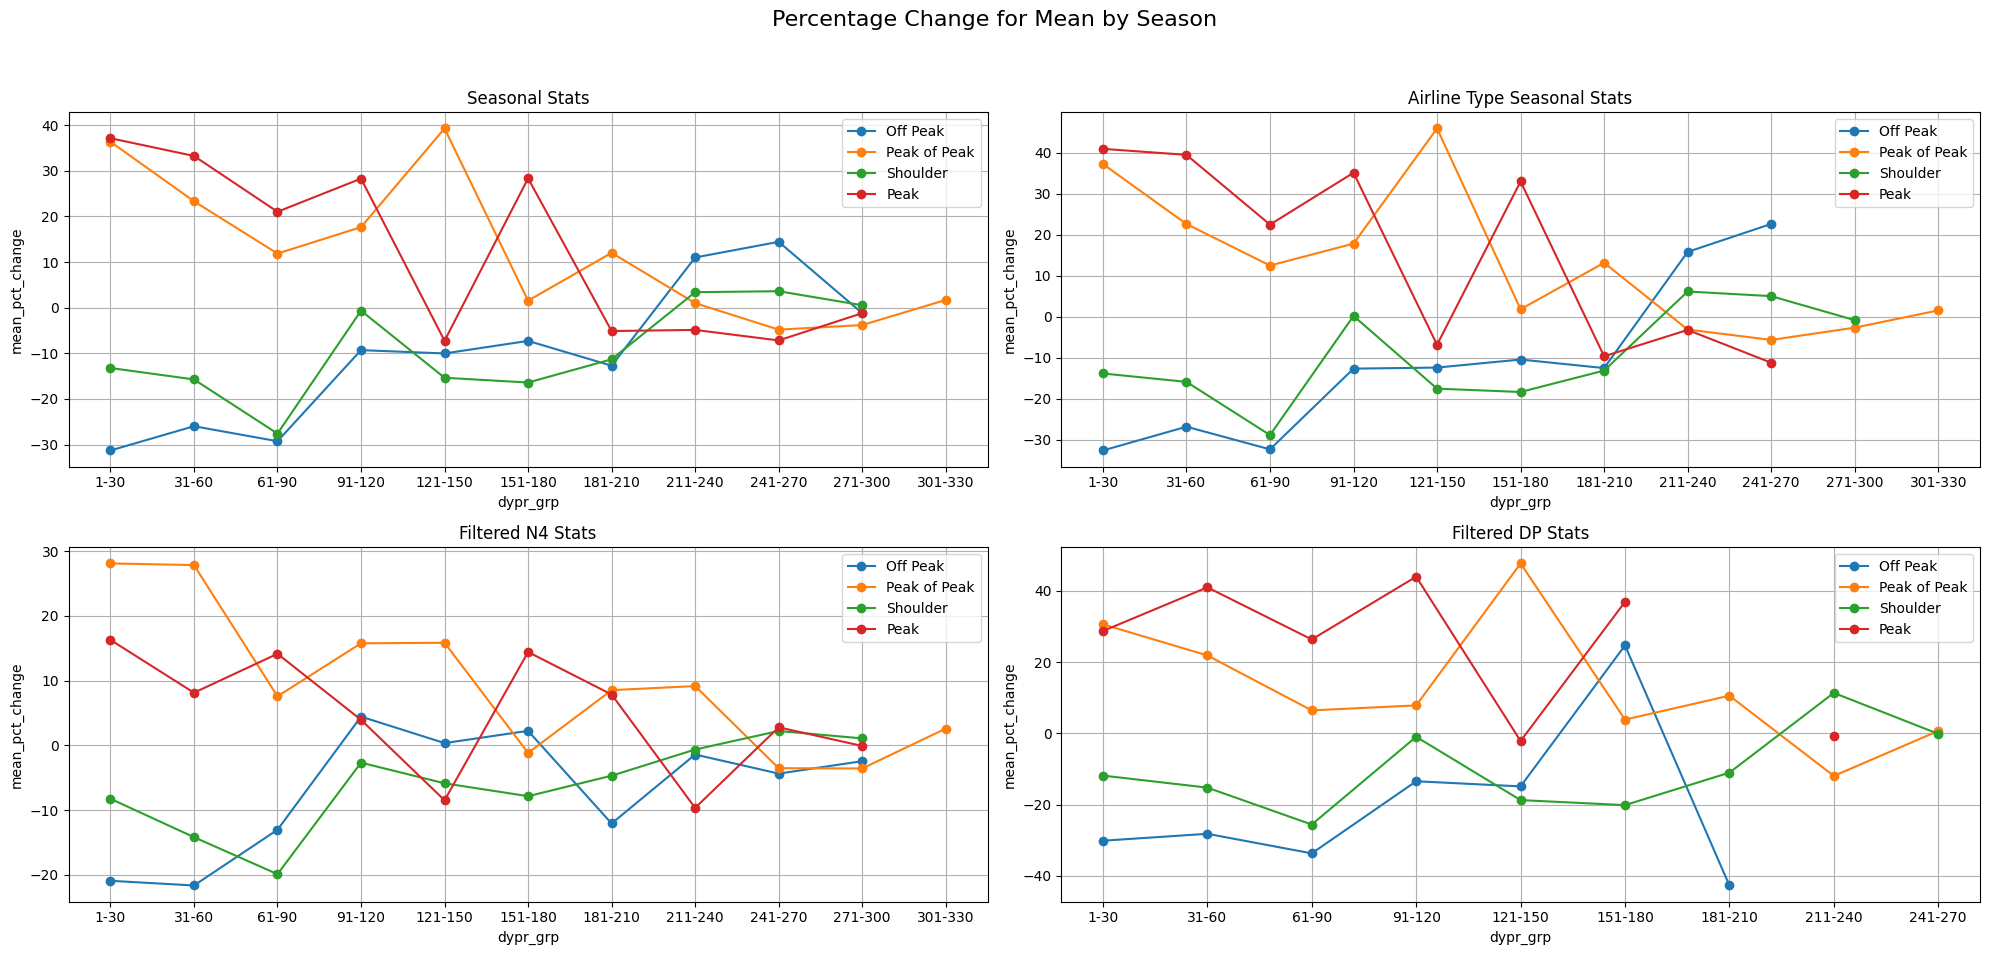

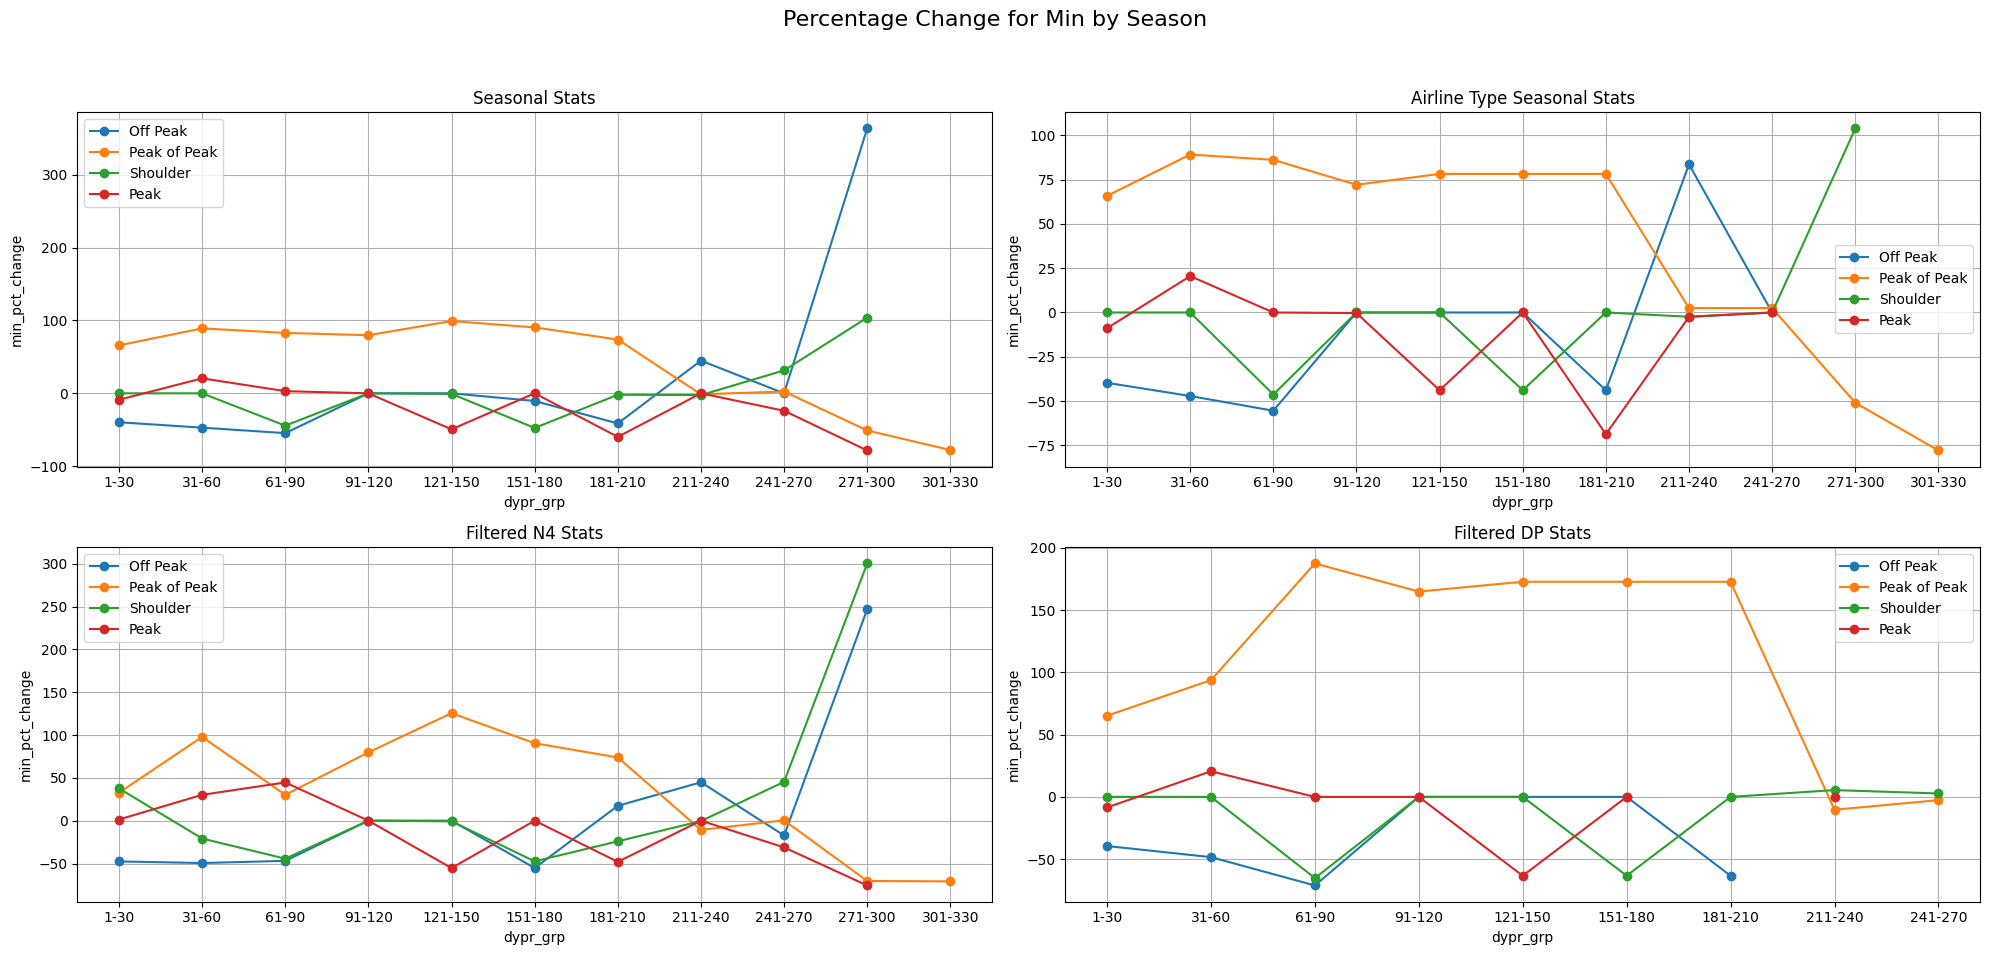

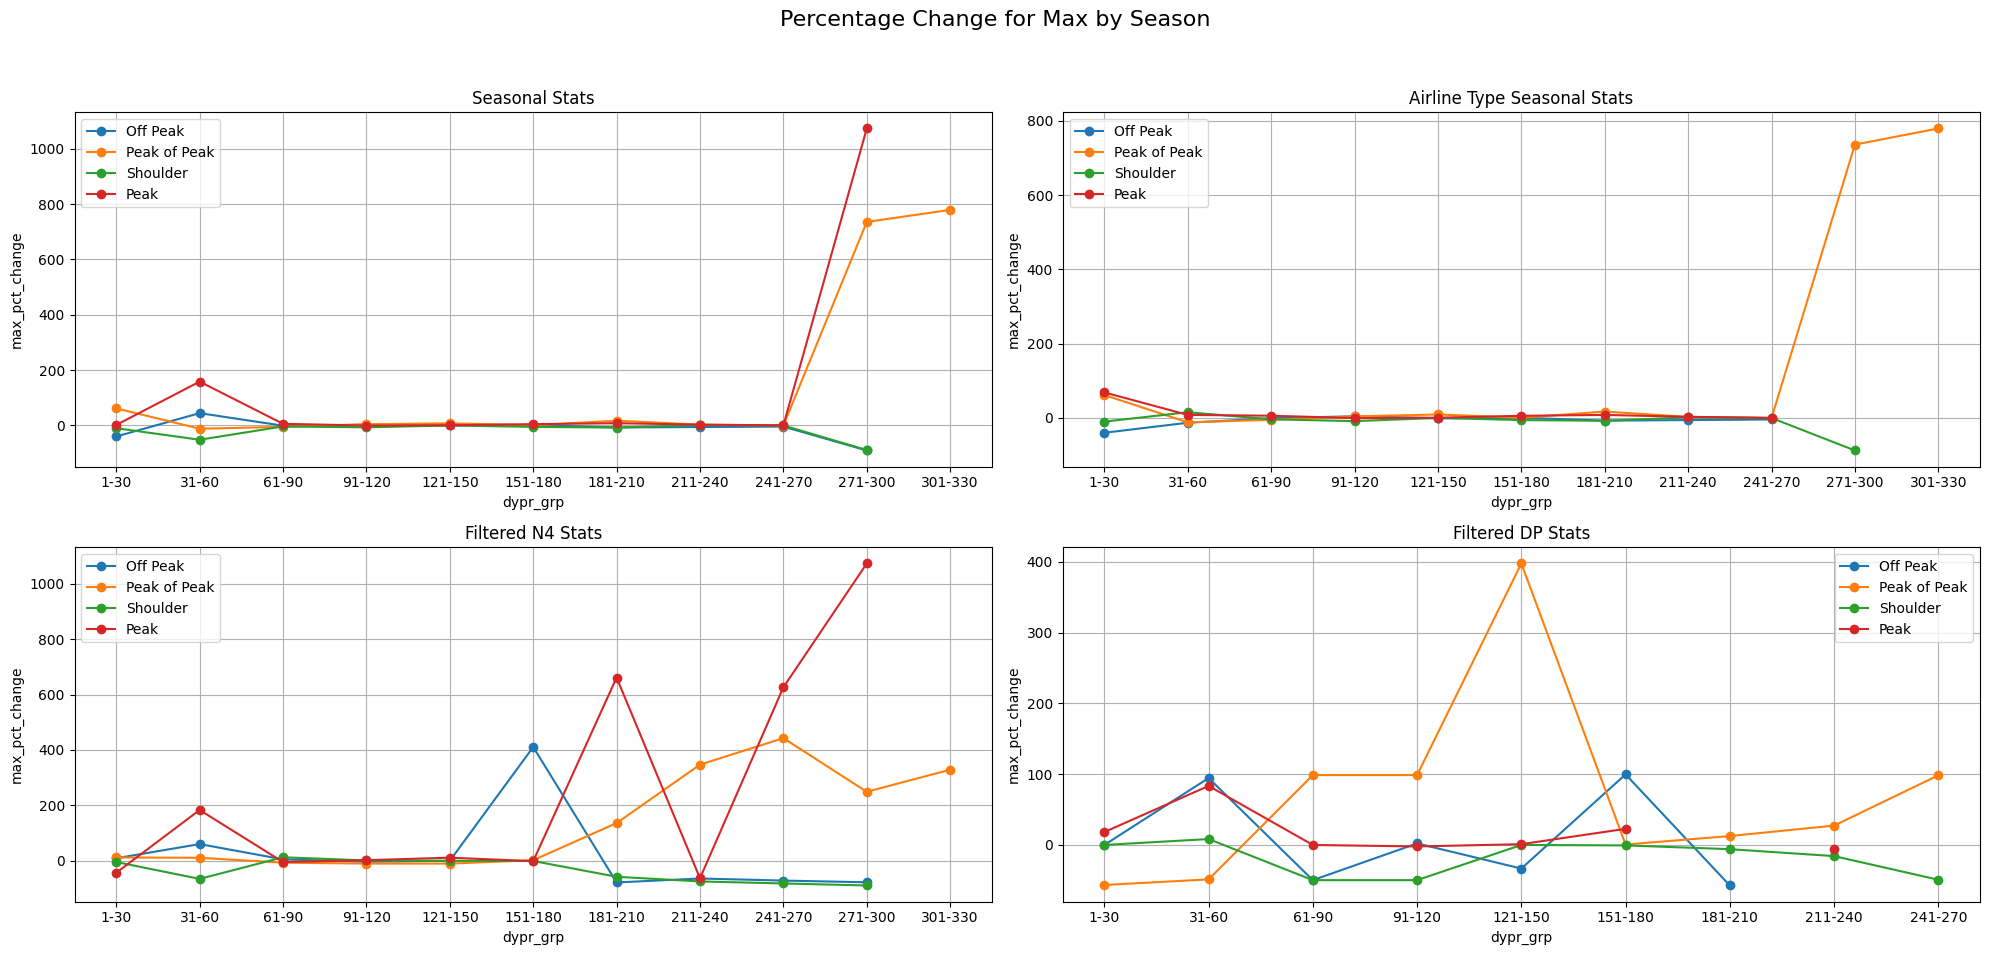

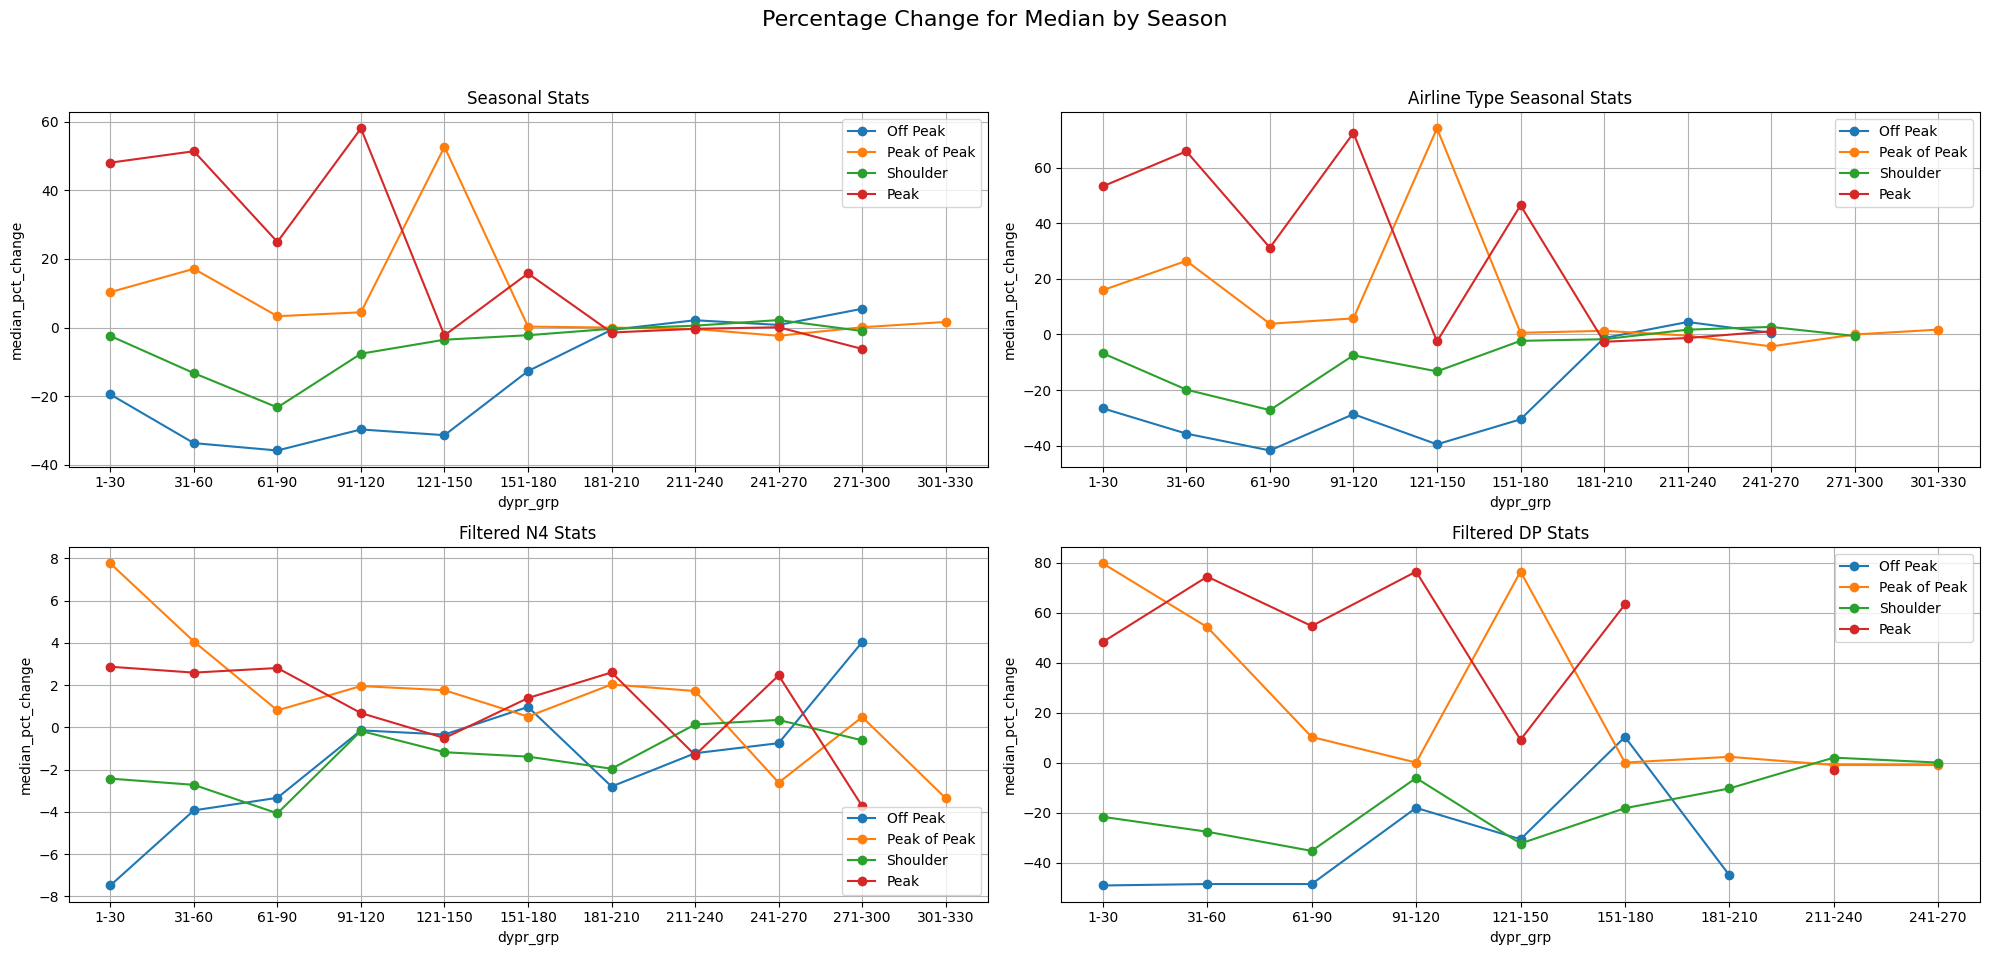

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_percentage_changes_by_season(data_frames, stats_types):
    for stat_type in stats_types:
        fig, axs = plt.subplots(2, 2, figsize=(20, 10))  # 2x2 subplot düzeni
        fig.suptitle(f'Percentage Change for {stat_type.replace("_pct_change", "").title()} by Season', fontsize=16)

        for i, (df, title) in enumerate(data_frames):
            ax = axs[i // 2, i % 2]  # subplot pozisyonunu belirle

            # 'Season' sütununun varlığını kontrol et
            if 'Season' in df.columns:
                # Benzersiz mevsim değerlerini al
                seasons = df['Season'].unique()
                
                for season in seasons:
                    # Mevsime göre filtrele
                    season_df = df[df['Season'] == season]
                    
                    # 'N/A' değerlerini np.nan ile değiştir ve float'a çevir
                    y_values = season_df[stat_type].replace('N/A', np.nan).astype(float)
                    
                    ax.plot(season_df['dypr_grp'], y_values, marker='o', linestyle='-', label=f"{season}")
            else:
                print(f"'Season' sütunu {title} veri çerçevesinde bulunamadı. Bu veri çerçevesi için sezon bazlı grafik çizilemez.")
                continue
            
            ax.set_title(title)
            ax.set_xlabel('dypr_grp')
            ax.set_ylabel(stat_type)
            ax.grid(True)
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Veri çerçevelerini ve başlıklarını içeren bir liste
data_frames = [
    (stats_season, "Seasonal Stats"),
    (stats_airline_type_season, "Airline Type Seasonal Stats"),
    (stats_stats_filtered_n4, "Filtered N4 Stats"),
    (stats_stats_filtered_dp, "Filtered DP Stats")
]

# İstatistik türlerini içeren bir liste
stats_types = ['mean_pct_change', 'min_pct_change', 'max_pct_change', 'median_pct_change']

# Fonksiyonu çağır
plot_percentage_changes_by_season(data_frames, stats_types)


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def plot_percentage_changes_by_season(data_frames, stats_types):
    # Grafiklerin kaydedileceği klasör yolu
    output_folder = 'seasonal_stats_graphs_3/'
    
    # Klasör yoksa oluştur
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Dinamik olarak subplot boyutlarını ayarla
    for stat_type in stats_types:
        for df, title in data_frames:
            # Veri çerçevesi için bir figür oluştur
            fig, ax = plt.subplots(figsize=(10, 6))
            fig.suptitle(f'{title} - {stat_type.replace("_pct_change", "").title()} by Season')
            
            # 'Season' sütununun varlığını kontrol et
            if 'Season' in df.columns:
                seasons = df['Season'].unique()
                
                for season in seasons:
                    season_df = df[df['Season'] == season]
                    # 'N/A' değerlerini np.nan ile değiştir ve float'a çevir
                    y_values = season_df[stat_type].replace('N/A', np.nan).astype(float)
                    ax.plot(season_df['dypr_grp'], y_values, marker='o', linestyle='-', label=season)
                
                ax.set_xlabel('dypr_grp')
                ax.set_ylabel(stat_type)
                ax.grid(True)
                ax.legend()
                
                # Grafik dosyasını kaydet
                graph_filename = f"{title.replace(' ', '_')}_{stat_type}.png"
                plt.savefig(os.path.join(output_folder, graph_filename))
                plt.close(fig)  # Açık figürleri kapat
            else:
                print(f"'Season' sütunu {title} veri çerçevesinde bulunamadı.")

# Veri çerçevelerini ve başlıklarını içeren bir liste
data_frames = [
    (stats_season, "Seasonal Stats"),
    (stats_airline_type_season, "Airline Type Seasonal Stats"),
    (stats_stats_filtered_n4, "Filtered N4 Stats"),
    (stats_stats_filtered_dp, "Filtered DP Stats")
]

# İstatistik türlerini içeren bir liste
stats_types = ['mean_pct_change', 'min_pct_change', 'max_pct_change', 'median_pct_change']

# Fonksiyonu çağır
# 
plot_percentage_changes_by_season(data_frames, stats_types)


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('TKAgg')  # ya da "TKAgg", 'Qt5Agg', 'GTK3Agg', vb. diğer GUI backendleri

# Gruplandırılan istatistikleri hesaplama
stats = df_2023.groupby(['Season', 'dypr_grp'])['price']

# Box plot çizme
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarlama
sns.boxplot(x='dypr_grp', y='price', data=df_2023, hue='Airline Type')
plt.title('Fiyat Dağılımı Box Plot')
plt.xlabel('Gün Aralığı Grubu')
plt.ylabel('Fiyat')
plt.xticks(rotation=45) # x eksenindeki etiketleri döndürme
plt.legend(title='Havayolu Tipi')
plt.show()


In [121]:

# 'N4' Airline Type için veriyi filtreleme
df_N4 = df_2023[df_2023['Airline Type'] == 'N4']

# Gruplandırılan istatistikleri hesaplama (filtrelenmiş veri üzerinde)
# Not: Bar chart için bu aşama gerekli değil, doğrudan seaborn ile çizebiliriz.

# Bar chart çizme (filtrelenmiş veri üzerinde)
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarlama
sns.barplot(x='dypr_grp', y='price', data=df_N4, ci=None) # ci=None güven aralığını kaldırır
plt.title('N4 Havayolu Tipi için Fiyat Dağılımı Bar Chart')
plt.xlabel('Gün Aralığı Grubu')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45) # x eksenindeki etiketleri döndürme
plt.show()


C:\Users\ekoca\AppData\Local\Temp\ipykernel_10176\1838971537.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dypr_grp', y='price', data=df_N4, ci=None) # ci=None güven aralığını kaldırır


In [122]:
# 'N4' Airline Type için veriyi filtreleme
df_N4 = df_2023[df_2023['Airline Type'] == 'N4']

# Medyan fiyatları hesaplama
median_prices = df_N4.groupby('dypr_grp')['price'].median().reset_index()

# Bar chart çizme (medyan fiyatlar kullanılarak)
plt.figure(figsize=(10, 6)) # Grafik boyutunu ayarlama
sns.barplot(x='dypr_grp', y='price', data=median_prices)
plt.title('N4 Havayolu Tipi için Medyan Fiyat Dağılımı Bar Chart')
plt.xlabel('Gün Aralığı Grubu')
plt.ylabel('Medyan Fiyat')
plt.xticks(rotation=45) # x eksenindeki etiketleri döndürme
plt.show()


In [ ]:
# 1. ve 3. çeyrek değerlerini hesaplama
q1 = df_2023.groupby(df_2023['dypr_grp'])['price'].quantile(0.25)
q3 = df_2023.groupby(df_2023['dypr_grp'])['price'].quantile(0.75)
iqr = q3 - q1

# IQR ile aykırı değer sınırlarını hesaplama
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Aykırı değer olmayanları hesaplama (aykırı değerleri belirlemek için)
# Bu adım, her bir fiyatın aykırı değer olup olmadığını kontrol etmek için kullanılabilir,
# ancak büyük veri setleri için verimli olmayabilir

# Aykırı değer sınırlarını 'stats' DataFrame'ine ekleme
stats['Q1'] = q1
stats['Q3'] = q3
stats['Lower Bound'] = lower_bound
stats['Upper Bound'] = upper_bound

In [64]:
stats.to_excel('market_fares_by_dypr.xlsx', index = True)

In [65]:

import numpy as np

# Örnek bir DataFrame varsayalım (df)
# df['coll_date'] ve df['price'] sütunlarını içermeli

# 'coll_date' sütununu datetime türüne dönüştürme ve 2023 yılı verilerini filtreleme

df_2023_n4 = data_hub[(data_hub['dep_year'] == 2023) & (filtered_data['Airline Type'] == "N4")]

# Yıl bazında gruplama ve istatistikleri hesaplama
stats_N4 = df_2023_n4.groupby(df_2023_n4['dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median'])

# 1. ve 3. çeyrek değerlerini hesaplama
q1 = df_2023_n4.groupby(df_2023_n4['dypr_grp'])['price'].quantile(0.25)
q3 = df_2023_n4.groupby(df_2023_n4['dypr_grp'])['price'].quantile(0.75)
iqr = q3 - q1

# IQR ile aykırı değer sınırlarını hesaplama
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Aykırı değer olmayanları hesaplama (aykırı değerleri belirlemek için)
# Bu adım, her bir fiyatın aykırı değer olup olmadığını kontrol etmek için kullanılabilir,
# ancak büyük veri setleri için verimli olmayabilir

# Aykırı değer sınırlarını 'stats' DataFrame'ine ekleme
stats_N4['Q1'] = q1
stats_N4['Q3'] = q3
stats_N4['Lower Bound'] = lower_bound
stats_N4['Upper Bound'] = upper_bound

# Sonuçları göster
print(stats_N4)

                  mean     min       max   median        Q1       Q3  \
dypr_grp                                                               
1-30      11793.676041  1140.0  141209.0  10618.0   7755.00  11904.0   
31-60     11077.716778  1175.0  345009.0  10473.0   6185.00  11171.0   
61-90     11185.442751  1140.0  130123.0  10468.0   6770.25  11071.0   
91-120    11033.293634  1140.0  130123.0  10565.0  10013.00  11033.0   
121-150   10906.686075  1140.0  128478.0  10585.0  10068.00  10999.0   
151-180   10788.124993  1140.0  129413.0  10610.0  10073.00  10978.0   
181-210   10514.657279  1249.0  115383.0  10590.0  10074.00  10955.0   
211-240   10417.174843  2185.0  113918.0  10546.0  10084.75  10948.0   
241-270   10239.237235  1685.0  101243.0  10532.0  10140.00  10924.0   
271-300   10589.493927  2499.0  128553.0  10546.0  10154.00  10933.0   
301-330   10824.176292  2960.0   48908.0  10530.0  10185.00  10924.0   
331-360            NaN     NaN       NaN      NaN       NaN     

In [66]:
stats_N4.to_excel('stats_N4.xlsx', index = True)

In [ ]:
Competitor

In [67]:
df_2023_Competitor = data_hub[(data_hub['dep_year'] == 2023) & (data_hub['Airline Type'] == "Competitor")]

# Yıl bazında gruplama ve istatistikleri hesaplama
stats_Competitor = df_2023_Competitor.groupby(df_2023_Competitor['dypr_grp'])['price'].agg(['mean', 'min', 'max', 'median'])

# 1. ve 3. çeyrek değerlerini hesaplama
q1 = df_2023_Competitor.groupby(df_2023_Competitor['dypr_grp'])['price'].quantile(0.25)
q3 = df_2023_Competitor.groupby(df_2023_Competitor['dypr_grp'])['price'].quantile(0.75)
iqr = q3 - q1

# IQR ile aykırı değer sınırlarını hesaplama
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Aykırı değer olmayanları hesaplama (aykırı değerleri belirlemek için)
# Bu adım, her bir fiyatın aykırı değer olup olmadığını kontrol etmek için kullanılabilir,
# ancak büyük veri setleri için verimli olmayabilir

# Aykırı değer sınırlarını 'stats' DataFrame'ine ekleme
stats_Competitor['Q1'] = q1
stats_Competitor['Q3'] = q3
stats_Competitor['Lower Bound'] = lower_bound
stats_Competitor['Upper Bound'] = upper_bound

# Sonuçları göster
print(stats_Competitor)

                  mean     min       max   median       Q1       Q3  \
dypr_grp                                                              
1-30      12954.544638  1070.0  315628.0  10281.0   5897.0  14270.0   
31-60     11399.018062  1174.0  166844.0  10050.0   5897.0  12500.0   
61-90     11034.703057   974.0  141825.0  10025.0   5897.0  12366.0   
91-120    11013.519185  1270.0  138745.0  10001.0   6050.0  12235.0   
121-150   10969.574605  1274.0  139502.0  10001.0   6474.0  11774.0   
151-180   11079.118641  1274.0  135455.0  10001.0   6900.0  11674.0   
181-210   11047.417956  1274.0  136200.0  10109.0   6947.0  11500.0   
211-240   11303.416579  2215.0  123137.0  10115.0   7474.0  11500.0   
241-270   11110.590574  2215.0  114860.0  10115.0   7705.5  11274.0   
271-300   10391.311748  2215.0  119484.0  10000.0   8175.0  11147.0   
301-330   10761.732955  2215.0  114473.0  10000.0  10000.0  11585.0   
331-360            NaN     NaN       NaN      NaN      NaN      NaN   
361-39

In [68]:
stats_Competitor.to_excel('stats_Competitor.xlsx', index = True)

In [71]:
## GÜNLÜK ÜCRET DEĞİŞİMLERİ###

# Öncelikle 'df_filtered' DataFrame'i oluştururken .copy() kullanarak bu DataFrame'in bağımsız bir kopyasını oluşturun
df_filtered = data_hub[(data_hub['Prefix'] == 'N4') & (data_hub['dep_date'].dt.year == 2023)].copy()

# DataFrame'i 'ond', 'departure_date', 'flight_no' ve 'coll_date' sütunlarına göre sıralama
df_filtered.sort_values(by=['ond', 'dep_date', 'Number', 'coll_date'], inplace=True)

# .loc kullanarak 'previous_price' ve 'price_change' sütunlarını güvenli bir şekilde oluşturma
df_filtered.loc[:, 'previous_price'] = df_filtered.groupby(['ond', 'dep_date', 'Number'])['price'].shift(1)
df_filtered.loc[:, 'price_change'] = df_filtered['price'] - df_filtered['previous_price']

# Fiyat değişimine göre etiketleme fonksiyonu
def change_label(row):
    if pd.isnull(row['previous_price']):  # Eğer 'previous_price' verisi yoksa
        return 'first observation'  # Bu durumda 'first observation' etiketi döndür
    elif pd.isnull(row['price_change']):
        return 'Değişim Yok'
    elif row['price_change'] > 0:
        return 'Artış'
    elif row['price_change'] < 0:
        return 'Azalış'
    else:
        return 'Değişim Yok'

# .apply() kullanarak 'change_label' sütununu oluşturma
df_filtered['change_label'] = df_filtered.apply(change_label, axis=1)

# Sonuçları göster
print(df_filtered[['ond', 'dep_date', 'Number', 'coll_date', 'price', 'previous_price', 'price_change', 'change_label']])



              ond   dep_date Number  coll_date  price  previous_price  \
28032154  AER-BAX 2023-01-02    487 2022-07-31  10013             NaN   
27789931  AER-BAX 2023-01-03    487 2022-09-19  10013             NaN   
27521391  AER-BAX 2023-01-03    487 2022-09-24  10013         10013.0   
27800734  AER-BAX 2023-01-03    487 2022-12-06  10013         10013.0   
27691602  AER-BAX 2023-01-03    487 2022-12-12  10013         10013.0   
...           ...        ...    ...        ...    ...             ...   
26784995  YKS-KZN 2023-05-19    780 2022-09-17  10679             NaN   
26079355  YKS-KZN 2023-06-02    780 2022-09-10  10679             NaN   
26548583  YKS-KZN 2023-07-21    780 2022-10-08  10759             NaN   
28939152  YKS-KZN 2023-07-25    780 2022-09-17  10759             NaN   
27285955  YKS-KZN 2023-08-01    780 2022-11-05  10759             NaN   

          price_change       change_label  
28032154           NaN  first observation  
27789931           NaN  first obser

In [72]:
df_filtered.to_excel("price_change_n4.xlsx", index = False)

In [123]:
## GÜNLÜK ÜCRET DEĞİŞİMLERİ###

# Öncelikle 'df_filtered' DataFrame'i oluştururken .copy() kullanarak bu DataFrame'in bağımsız bir kopyasını oluşturun
df_filtered = data_hub[(data_hub['Prefix'] == 'N4') & (data_hub['dep_date'].dt.year == 2023)].copy()

# DataFrame'i 'ond', 'dep_date', 'flight_no' ve 'dypr_grp' sütunlarına göre sıralama
df_filtered.sort_values(by=['ond', 'dep_date', 'Number', 'dypr_grp'], inplace=True)

# .loc kullanarak 'previous_price' ve 'price_change' sütunlarını güvenli bir şekilde oluşturma
df_filtered.loc[:, 'previous_price'] = df_filtered.groupby(['ond', 'dep_date', 'Number'])['price'].shift(1)
df_filtered.loc[:, 'price_change'] = df_filtered['price'] - df_filtered['previous_price']

# Fiyat değişimine göre etiketleme fonksiyonu
def change_label(row):
    if pd.isnull(row['previous_price']):  # Eğer 'previous_price' verisi yoksa
        return 'first observation'  # Bu durumda 'first observation' etiketi döndür
    elif row['price_change'] > 0:
        return 'Artış'
    elif row['price_change'] < 0:
        return 'Azalış'
    else:
        return 'Değişim Yok'

# .apply() kullanarak 'change_label' sütununu oluşturma
df_filtered['change_label'] = df_filtered.apply(change_label, axis=1)

# Sonuçları göster
print(df_filtered[['ond', 'dep_date', 'Number', 'dypr_grp', 'price', 'previous_price', 'price_change', 'change_label']])


             ond   dep_date Number dypr_grp  price  previous_price  \
760380   AER-BAX 2023-01-02    487  151-180  10013             NaN   
590769   AER-BAX 2023-01-03    487     1-30  10013             NaN   
675599   AER-BAX 2023-01-03    487     1-30  10013         10013.0   
583462   AER-BAX 2023-01-03    487   91-120  10013         10013.0   
674816   AER-BAX 2023-01-03    487   91-120  10013         10013.0   
...          ...        ...    ...      ...    ...             ...   
70238    YKS-KZN 2023-06-02    780  241-270  10679         10679.0   
227229   YKS-KZN 2023-07-21    780  271-300  10759             NaN   
1065554  YKS-KZN 2023-07-25    780  301-330  10759             NaN   
503245   YKS-KZN 2023-08-01    780  241-270  10759             NaN   
503246   YKS-KZN 2023-08-01    780  241-270  10759         10759.0   

         price_change       change_label  
760380            NaN  first observation  
590769            NaN  first observation  
675599            0.0        D

In [130]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Veri tiplerini uygun formata dönüştürme
data_hub['dep_date'] = pd.to_datetime(df['dep_date'])

# Maksimum coll_date değerine sahip kayıtları filtrele
max_coll_date = data_hub['coll_date'].max()
df_filtered_hist = data_hub[data_hub['coll_date'] == max_coll_date]

# Gruplandırma ve her grubun N4 ve rakiplerinin minimum ücretlerini hesaplama
min_prices = df_filtered_hist.groupby(['dep_date','Org', 'Dest', 'Prefix'])['price'].min().reset_index()

# N4 ve Competitors arasındaki minimum ücret farkını hesaplama
# Önce her bir grup için N4 ve Competitors'ı ayır
n4_prices = min_prices[min_prices['Prefix'] == 'N4']
competitor_prices = min_prices[min_prices['Prefix'] == 'DP']

# Birleştirme işlemi için ortak sütunları belirle
common_cols = ['dep_date', 'Org', 'Dest']
merged_prices = pd.merge(n4_prices, competitor_prices, on=common_cols, suffixes=('_N4', '_Comp'))

# Fiyat farkını hesaplama
merged_prices['price_diff'] = merged_prices['price_N4'] - merged_prices['price_Comp']

# Farkların dağılımını gösteren bir histogram çizme
plt.figure(figsize=(10, 6))
plt.hist(merged_prices['price_diff'], bins=10, color='blue', edgecolor='black')
plt.title('N4 ve Rakipler Arasındaki Minimum Ücret Farkının Dağılımı')
plt.xlabel('Fiyat Farkı')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Maksimum coll_date değerine sahip kayıtları filtrele
max_coll_date = data_hub['coll_date'].max()
df_filtered_hist = data_hub[data_hub['coll_date'] == max_coll_date]

# Gruplandırma ve her grubun N4 ve rakiplerinin minimum ücretlerini hesaplama
min_prices = df_filtered_hist.groupby(['dep_date', 'Org', 'Dest', 'Prefix'])['price'].min().reset_index()

# N4 ve Competitors arasındaki minimum ücret farkını hesaplama
# Önce her bir grup için N4 ve Competitors'ı ayır
n4_prices = min_prices[min_prices['Prefix'] == 'N4']
competitor_prices = min_prices[min_prices['Prefix'] == 'DP']

# Birleştirme işlemi için ortak sütunları belirle
common_cols = ['dep_date', 'Org', 'Dest']
merged_prices = pd.merge(n4_prices, competitor_prices, on=common_cols, suffixes=('_N4', '_Comp'))

# Fiyat farkını hesaplama
merged_prices['price_diff'] = merged_prices['price_N4'] - merged_prices['price_Comp']

# Farkların dağılımını gösteren bir yoğunluk grafiği çizme
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_prices['price_diff'], bw_adjust=0.5, color='blue')
plt.title('N4 ve DP Arasındaki Minimum Ücret Farkının Yoğunluk Dağılımı')
plt.xlabel('Fiyat Farkı')
plt.ylabel('Yoğunluk')
plt.grid(True)
plt.show()


In [92]:


# Ortalama ücretleri hesaplama
avg_prices = data_hub.groupby(['dep_date', 'Org', 'Dest', 'Airline Type', "Prefix",'ond'])['price'].mean().reset_index()

# N4 ve Competitors için ayrı ayrı ortalama ücretler
n4_avg_prices = avg_prices[avg_prices['Airline Type'] == 'N4']
competitor_avg_prices = avg_prices[avg_prices['Prefix'] == 'DP']

# Birleştirme ve ortalama ücret farkını hesaplama
common_cols_avg = ['dep_date', 'Org', 'Dest', 'ond']  # Birleştirme için ortak sütunlar
merged_avg_prices = pd.merge(n4_avg_prices, competitor_avg_prices, on=common_cols_avg, suffixes=('_N4', '_Comp'))

# Ortalama fiyat farkını hesaplama
merged_avg_prices['avg_price_diff'] = merged_avg_prices['price_N4'] - merged_avg_prices['price_Comp']

# Her 'ond' için ortalama ücret farkını gösterir tablo
ond_avg_diff = merged_avg_prices[['ond', 'avg_price_diff']].groupby('ond').mean().reset_index()

# Sonuçları göster
ond_avg_diff


,ond,avg_price_diff
0,AER-CEK,-274.097180
1,AER-CSY,-6226.500000
2,AER-KUF,235.100954
3,AER-KVX,-541.903083
4,AER-KZN,-254.251659
...,...,...
69,TJM-LED,1163.777778
70,TJM-MOW,1.362698
71,UFA-AER,314.718387
72,UFA-LED,456.614930


In [93]:
# Örnek özet tablo oluşturma
if not ond_avg_diff.empty:
    total_ond_count = len(ond_avg_diff)  # Toplam OND sayısı
    positive_diff_count = len(ond_avg_diff[ond_avg_diff['avg_price_diff'] > 0])  # Ortalama ücret farkı pozitif olan OND sayısı
    negative_diff_count = len(ond_avg_diff[ond_avg_diff['avg_price_diff'] < 0])  # Ortalama ücret farkı negatif olan OND sayısı
    zero_diff_count = len(ond_avg_diff[ond_avg_diff['avg_price_diff'] == 0])  # Ortalama ücret farkı sıfır olan OND sayısı

    # Özet tabloyu yazdır
    print(f"Toplam OND Sayısı: {total_ond_count}")
    print(f"Pozitif Ortalama Ücret Farkına Sahip OND Sayısı: {positive_diff_count}")
    print(f"Negatif Ortalama Ücret Farkına Sahip OND Sayısı: {negative_diff_count}")
    print(f"Sıfır Ortalama Ücret Farkına Sahip OND Sayısı: {zero_diff_count}")
else:
    print("Özet tablo oluşturulamadı çünkü veri seti boş.")


Toplam OND Sayısı: 74
Pozitif Ortalama Ücret Farkına Sahip OND Sayısı: 38
Negatif Ortalama Ücret Farkına Sahip OND Sayısı: 36
Sıfır Ortalama Ücret Farkına Sahip OND Sayısı: 0


In [87]:
# Ortalama ücretleri hesaplama
min_prices = data_hub.groupby(['dep_date', 'Org', 'Dest', 'Airline Type', 'ond'])['price'].min().reset_index()

# N4 ve Competitors için ayrı ayrı ortalama ücretler
n4_min_prices = min_prices[min_prices['Airline Type'] == 'N4']
competitor_min_pricess = min_prices[min_prices['Airline Type'] == 'Competitor']

# Birleştirme ve ortalama ücret farkını hesaplama
common_cols_min = ['dep_date', 'Org', 'Dest', 'ond']  # Birleştirme için ortak sütunlar
merged_min_prices = pd.merge(n4_min_prices, competitor_min_pricess, on=common_cols_min, suffixes=('_N4', '_Comp'))

# Ortalama fiyat farkını hesaplama
merged_min_prices['ond_min_diff'] = merged_min_prices['price_N4'] - merged_min_prices['price_Comp']

# Her 'ond' için ortalama ücret farkını gösterir tablo
ond_min_diff = merged_min_prices[['ond', 'ond_min_diff']].groupby('ond').min().reset_index()

# Sonuçları göster
ond_min_diff

,ond,ond_min_diff
0,AER-BAX,-9330
1,AER-CEK,-7419
2,AER-CSY,-10689
3,AER-GOJ,-97840
4,AER-IAR,-13370
...,...,...
157,UFA-DYU,-39518
158,UFA-LED,-21420
159,UFA-MOW,-5424
160,UFA-OGZ,-6880


In [89]:
# Örnek özet tablo oluşturma
if not ond_min_diff.empty:
    total_ond_count = len(ond_min_diff)  # Toplam OND sayısı
    positive_diff_count = len(ond_min_diff[ond_min_diff['ond_min_diff'] > 0])  # Ortalama ücret farkı pozitif olan OND sayısı
    negative_diff_count = len(ond_min_diff[ond_min_diff['ond_min_diff'] < 0])  # Ortalama ücret farkı negatif olan OND sayısı
    zero_diff_count = len(ond_min_diff[ond_min_diff['ond_min_diff'] == 0])  # Ortalama ücret farkı sıfır olan OND sayısı

    # Özet tabloyu yazdır
    print(f"Toplam OND Sayısı: {total_ond_count}")
    print(f"Pozitif Min Ücret Farkına Sahip OND Sayısı: {positive_diff_count}")
    print(f"Negatif Min Ücret Farkına Sahip OND Sayısı: {negative_diff_count}")
    print(f"Sıfır Min Ücret Farkına Sahip OND Sayısı: {zero_diff_count}")
else:
    print("Özet tablo oluşturulamadı çünkü veri seti boş.")

Toplam OND Sayısı: 162
Pozitif Min Ücret Farkına Sahip OND Sayısı: 17
Negatif Min Ücret Farkına Sahip OND Sayısı: 145
Sıfır Min Ücret Farkına Sahip OND Sayısı: 0


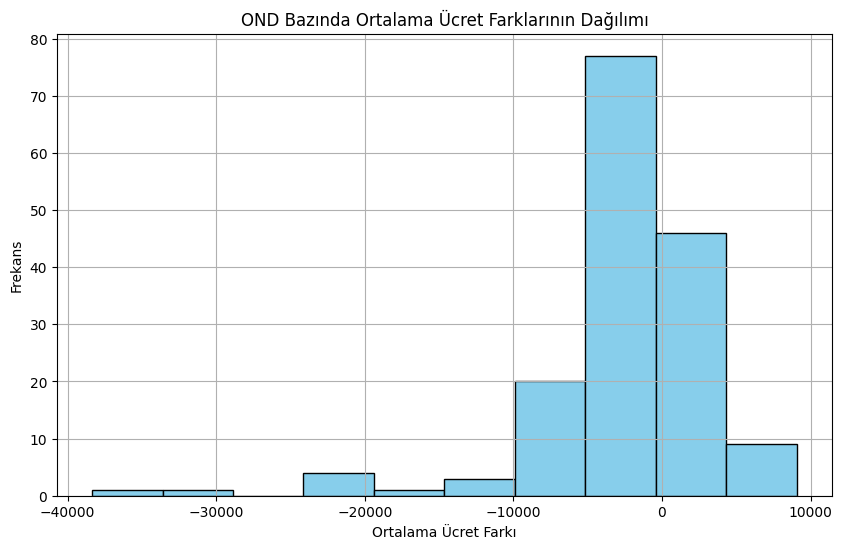

In [80]:
# Histogram çizimi için Matplotlib kütüphanesini kullanma
import matplotlib.pyplot as plt

# Eğer 'ond_avg_diff' boş değilse histogramı çiz
if not ond_avg_diff.empty:
    plt.figure(figsize=(10, 6))
    plt.hist(ond_avg_diff['avg_price_diff'], bins=10, color='skyblue', edgecolor='black')
    plt.title('OND Bazında Ortalama Ücret Farklarının Dağılımı')
    plt.xlabel('Ortalama Ücret Farkı')
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()
else:
    print("Histogram çizimi için yeterli veri bulunmamaktadır.")


In [ ]:
import matplotlib.pyplot as plt

# Önceden hesaplanmış ve sütun adları düzenlenmiş DataFrame kullanılıyor
# ond_average_price DataFrame'i zaten oluşturulmuş ve düzenlenmiş olmalı


# Excel dosyası oluşturmak için bir ExcelWriter kullan
with pd.ExcelWriter('detayli_ortalama_ucret_raporu_line_graph_yillik.xlsx', engine='xlsxwriter') as writer:
    # Verisi olan unique 'ond' değerlerini bul
    unique_onds = ond_average_price['ond'].unique()
    
    for ond in unique_onds:
        # Şu anki 'ond' için DataFrame'i filtrele
        ond_df = ond_average_price[ond_average_price['ond'] == ond]
        
        # Eğer filtrelenmiş DataFrame boş değilse işleme devam et
        if not ond_df.empty:
            # Her bir 'ond' için bir Excel sayfasına tabloyu yaz
            ond_df.to_excel(writer, sheet_name=f"{ond}_detayli_ortalama_ucret", index=False)
            
            # Her bir yıl ve ay için ayrı grafikler çiz
            for year in ond_df['dep_year'].unique():
                plt.figure(figsize=(12, 8))
                # Yıla göre filtrele
                filtered_df = ond_df[ond_df['dep_year'] == year]
                plt.plot(filtered_df['dypr_grp'], filtered_df['average_price'], marker='o', linestyle='-', color='blue', label='Ortalama Ücret')
                plt.plot(filtered_df['dypr_grp'], filtered_df['min_price'], marker='x', linestyle='--', color='green', label='Min Ücret')
                plt.plot(filtered_df['dypr_grp'], filtered_df['max_price'], marker='^', linestyle='-.', color='red', label='Max Ücret')
                plt.title(f"Ortalama, Min ve Max Ücret - {ond} ({year})")
                plt.xlabel('DYPR Grup')
                plt.ylabel('Ücret')
                plt.xticks(rotation=45)
                plt.legend()
                plt.tight_layout()
                
                # Grafikleri PNG olarak kaydet
                plt.savefig(f"{ond}_detayli_ortalama_ucret_line_graph_{year}.png")
                plt.close()

# NOT: Bu kod, her 'ond' ve 'dep_year' için veri varsa line grafikler çizer ve Excel'e kaydeder. Grafiklerde yıl bilgisi de gösterilir.
